In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv("BEABDatas/main.csv")

In [4]:
df

,datetime,BTC,ETH,ADA,BNB
0,2017-10-01,4403.09,303.95,0.02519,1.522
1,2017-10-02,4401.32,296.81,0.02588,1.973
2,2017-10-03,4314.18,291.81,0.02084,1.837
3,2017-10-04,4218.66,291.68,0.02189,1.622
4,2017-10-05,4321.44,294.99,0.02152,1.674
...,...,...,...,...,...
1255,2021-03-09,54928.70,1872.10,1.19900,293.650
1256,2021-03-10,55893.31,1795.63,1.13300,278.680
1257,2021-03-11,57809.41,1827.06,1.12500,290.150
1258,2021-03-12,57256.22,1767.77,1.03200,263.210


In [5]:
df = df.set_index(pd.DatetimeIndex(df['datetime'].values))
df = df.drop(['datetime'],axis=1)

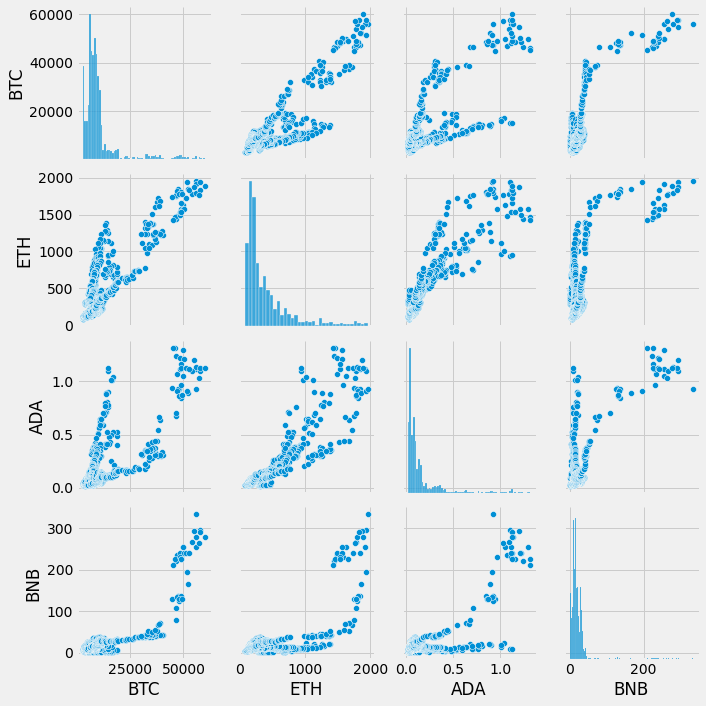

In [7]:
sns.pairplot(df,kind="scatter")

In [21]:
df.dtypes

Date     object
BTC     float64
ETH     float64
ADA     float64
BNB     float64
dtype: object

In [27]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df = df.drop(['Date'], axis=1)

In [28]:
df

,BTC,ETH,ADA,BNB
2017-10-01,4403.09,303.95,0.02519,1.522
2017-10-02,4401.32,296.81,0.02588,1.973
2017-10-03,4314.18,291.81,0.02084,1.837
2017-10-04,4218.66,291.68,0.02189,1.622
2017-10-05,4321.44,294.99,0.02152,1.674
...,...,...,...,...
2021-03-09,54928.70,1872.10,1.19900,293.650
2021-03-10,55893.31,1795.63,1.13300,278.680
2021-03-11,57809.41,1827.06,1.12500,290.150
2021-03-12,57256.22,1767.77,1.03200,263.210


In [30]:
#Get Some Statistics on the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BTC,1260.0,10667.333722,8865.625031,3232.51000,6542.167500,8550.02500,10676.2175,60064.650
ETH,1260.0,397.635984,353.559695,84.12000,178.147500,253.54500,467.2800,1957.470
ADA,1260.0,0.149352,0.206434,0.01849,0.044498,0.08162,0.1455,1.319
BNB,1260.0,22.606944,35.000879,1.18200,10.280000,15.88500,23.2075,333.360


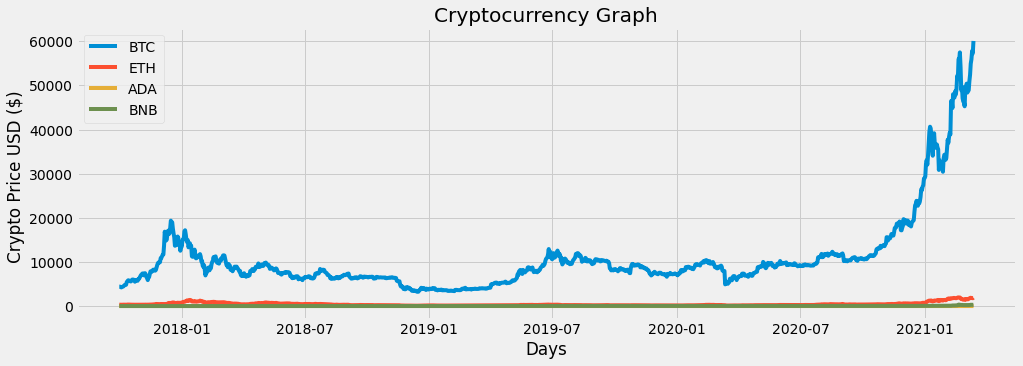

In [31]:
my_crypto = df
plt.figure(figsize=(15,5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c],label=c)
    
plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price USD ($) ')
plt.legend(my_crypto.columns.values,loc="upper left")
plt.show()

In [33]:
#Scale the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,100))
scaled = min_max_scaler.fit_transform(df)
scaled

array([[  2.0597148 ,  11.73459311,   0.51518251,   0.10235476],
       [  2.05660037,  11.35345771,   0.56823861,   0.23812534],
       [  1.90327163,  11.08655617,   0.18069834,   0.19718344],
       ...,
       [ 96.03175246,  93.03867403,  85.08277522,  86.99191397],
       [ 95.05837718,  89.87375557,  77.93173447,  78.88180433],
       [100.        ,  96.61035044,  85.23656104,  83.25295474]])

In [35]:
#conver the scaled data into a data frame

df_scale = pd.DataFrame(scaled,columns=df.columns)

df_scale = df_scale.set_index(pd.DatetimeIndex(df.index))
df_scale

,BTC,ETH,ADA,BNB
2017-10-01,2.059715,11.734593,0.515183,0.102355
2017-10-02,2.056600,11.353458,0.568239,0.238125
2017-10-03,1.903272,11.086556,0.180698,0.197183
2017-10-04,1.735198,11.079617,0.261436,0.132459
2017-10-05,1.916046,11.256306,0.232986,0.148113
...,...,...,...,...
2021-03-09,90.962948,95.442923,90.772851,88.045566
2021-03-10,92.660245,91.360931,85.697919,83.538946
2021-03-11,96.031752,93.038674,85.082775,86.991914
2021-03-12,95.058377,89.873756,77.931734,78.881804


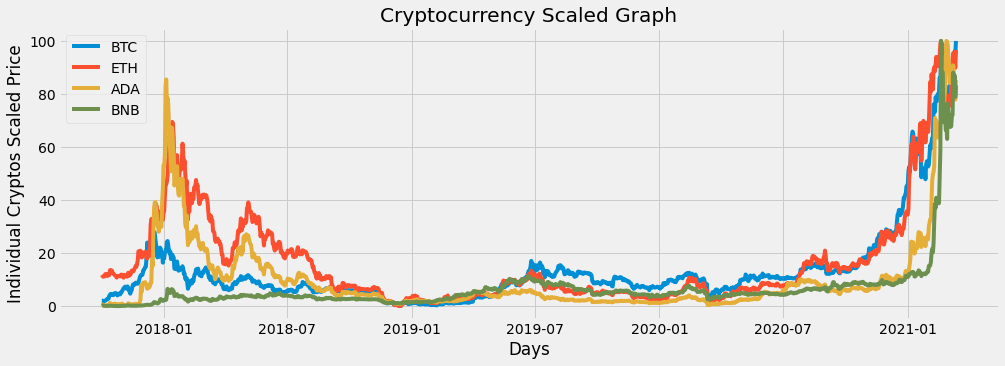

In [36]:
my_crypto = df_scale
plt.figure(figsize=(15,5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c],label=c)
    
plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Individual Cryptos Scaled Price')
plt.legend(my_crypto.columns.values,loc="upper left")
plt.show()

In [37]:
# get the daily simple return

DSR = df.pct_change(1)
DSR

,BTC,ETH,ADA,BNB
2017-10-01,NaN,NaN,NaN,NaN
2017-10-02,-0.000402,-0.023491,0.027392,0.296321
2017-10-03,-0.019799,-0.016846,-0.194745,-0.068931
2017-10-04,-0.022141,-0.000445,0.050384,-0.117039
2017-10-05,0.024363,0.011348,-0.016903,0.032059
...,...,...,...,...
2021-03-09,0.048157,0.020507,0.071492,0.219983
2021-03-10,0.017561,-0.040847,-0.055046,-0.050979
2021-03-11,0.034281,0.017504,-0.007061,0.041158
2021-03-12,-0.009569,-0.032451,-0.082667,-0.092849


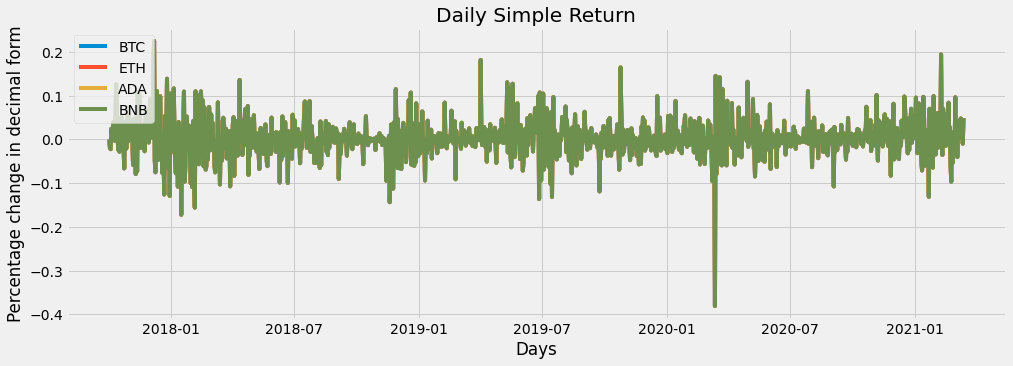

In [44]:
my_crypto = DSR
plt.figure(figsize=(15,5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto['BTC'],label=None)
    
plt.title('Daily Simple Return')
plt.xlabel('Days')
plt.ylabel('Percentage change in decimal form')
plt.legend(my_crypto.columns.values,loc="upper left")
plt.show()

In [45]:
#Print the volatility

print('The cryptocurrency volatility')
DSR.std()

The cryptocurrency volatility


BTC    0.042402
ETH    0.052611
ADA    0.086068
BNB    0.069030
dtype: float64

In [46]:
DSR.mean()

BTC    0.002990
ETH    0.002864
ADA    0.006140
BNB    0.006380
dtype: float64

In [47]:
#Get the correlation matrix

In [48]:
DSR.corr()

,BTC,ETH,ADA,BNB
BTC,1.000000,0.743329,0.494535,0.557992
ETH,0.743329,1.000000,0.565131,0.534205
ADA,0.494535,0.565131,1.000000,0.395028
BNB,0.557992,0.534205,0.395028,1.000000


<AxesSubplot:>

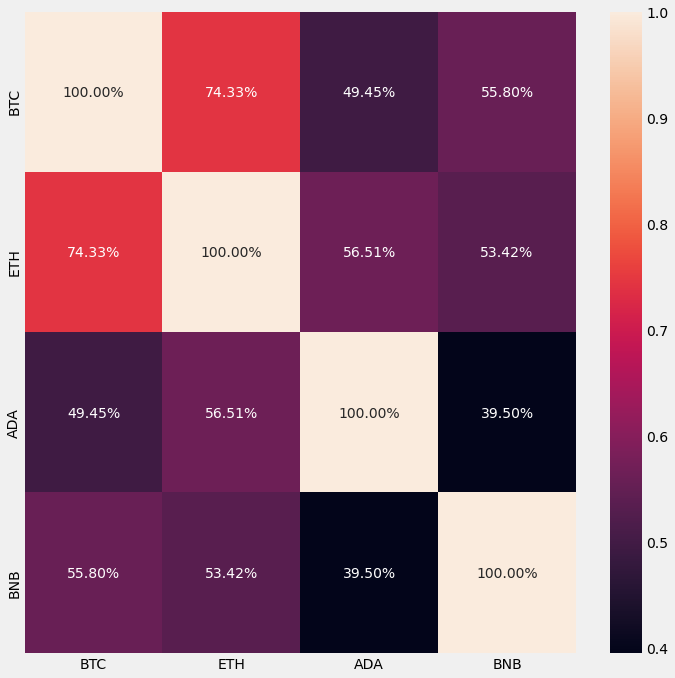

In [50]:
import seaborn as sns

plt.subplots(figsize = (11,11))
sns.heatmap(DSR.corr(),annot=True,fmt='.2%')

In [ ]:
#get and show the daily cumulative simple returns

In [52]:
DCSR = (DSR+1).cumprod()
DCSR

,BTC,ETH,ADA,BNB
2017-10-01,NaN,NaN,NaN,NaN
2017-10-02,0.999598,0.976509,1.027392,1.296321
2017-10-03,0.979807,0.960059,0.827312,1.206965
2017-10-04,0.958114,0.959632,0.868996,1.065703
2017-10-05,0.981456,0.970521,0.854307,1.099869
...,...,...,...,...
2021-03-09,12.475035,6.159237,47.598253,192.936925
2021-03-10,12.694110,5.907649,44.978166,183.101183
2021-03-11,13.129282,6.011054,44.660580,190.637319
2021-03-12,13.003645,5.815989,40.968638,172.936925


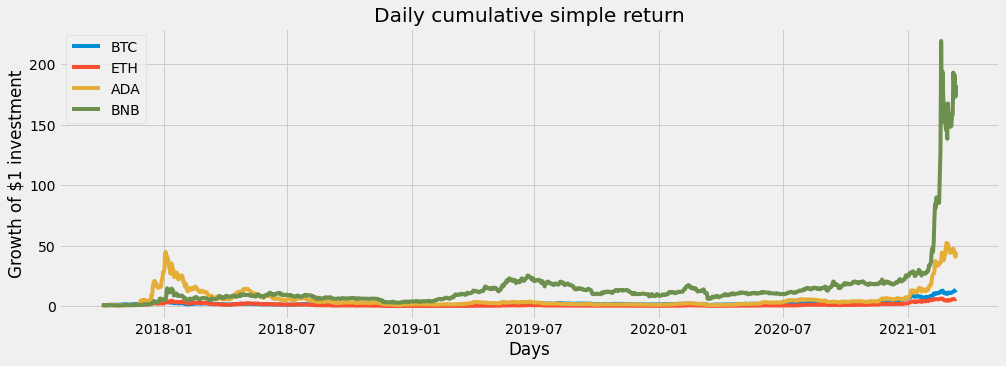

In [53]:
my_crypto = DCSR
plt.figure(figsize=(15,5))
for c in my_crypto.columns.values:
    plt.plot(my_crypto[c],label=c)
    
plt.title('Daily cumulative simple return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment')
plt.legend(my_crypto.columns.values,loc="upper left")
plt.show()

In [ ]:
#MachineLearning

In [54]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model  import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

plt.style.use('bmh')

In [55]:
df = pd.read_csv("BEABDatas/ADA.csv")

In [56]:
df

,datetime,low,high,open,close,volumefrom,volumeto
0,2017-10-01,0.01497,0.08806,0.03925,0.02519,1.714880e+09,4.319042e+07
1,2017-10-02,0.01972,0.03063,0.02519,0.02588,2.193437e+09,5.676562e+07
2,2017-10-03,0.02066,0.02683,0.02588,0.02084,7.182628e+08,1.496679e+07
3,2017-10-04,0.02033,0.02308,0.02084,0.02189,4.129679e+08,9.041869e+06
4,2017-10-05,0.02096,0.02269,0.02189,0.02152,2.516286e+08,5.415242e+06
...,...,...,...,...,...,...,...
1255,2021-03-09,1.10900,1.22000,1.11900,1.19900,1.049239e+08,1.221452e+08
1256,2021-03-10,1.11400,1.20800,1.19900,1.13300,6.831681e+07,7.930362e+07
1257,2021-03-11,1.11000,1.14000,1.13300,1.12500,5.480040e+07,6.153902e+07
1258,2021-03-12,1.02600,1.12900,1.12500,1.03200,1.078987e+08,1.152447e+08


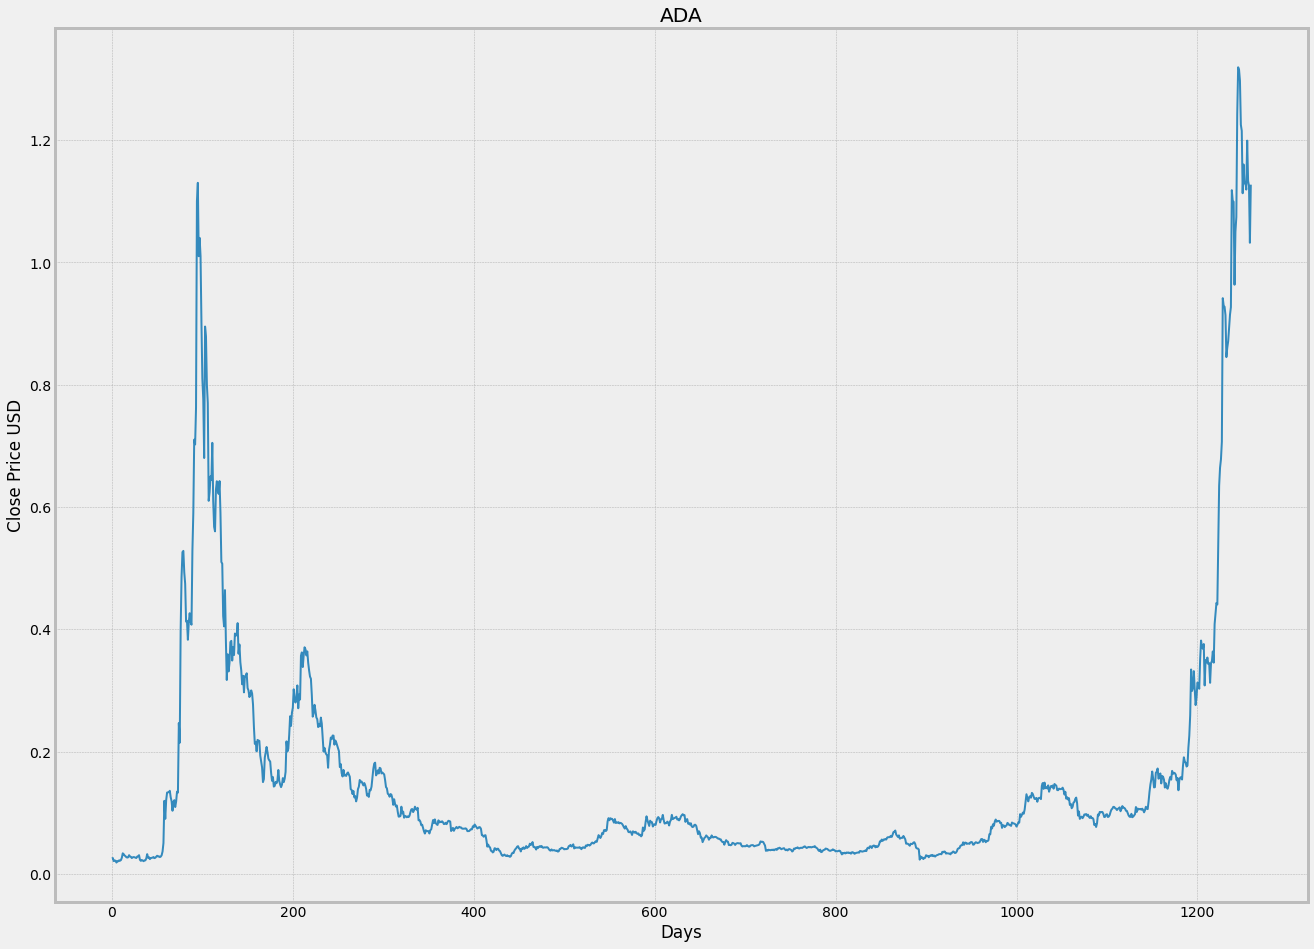

In [60]:
plt.figure(figsize=(20,15))
plt.title("ADA")
plt.xlabel('Days')
plt.ylabel("Close Price USD")
plt.plot(df['close']);


In [76]:
df = df[['close']]

In [77]:
#Create a variable to predict 'x' days out into the future

In [78]:
future_days = 25

In [81]:
df['Prediction'] = df[['close']].shift(-future_days)

<ipython-input-81-8e5ef4e85e1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['close']].shift(-future_days)


In [84]:
df.tail(6)

,close,Prediction
1254,1.119,NaN
1255,1.199,NaN
1256,1.133,NaN
1257,1.125,NaN
1258,1.032,NaN
1259,1.127,NaN


In [85]:
#Create the feature data set (X) and convert it to a numpy array and remove the last'x' rows/days

X = np.array(df.drop(['Prediction'],1))[:-future_days]

In [86]:
X

array([[0.02519],
       [0.02588],
       [0.02084],
       ...,
       [0.845  ],
       [0.8605 ],
       [0.8712 ]])

In [89]:
#Create the target data set (y) and convert it to a numpy array and get all of the target value except the last 'x' rows 
y = np.array(df['Prediction'])[:-future_days]
y

array([0.02714, 0.02646, 0.02588, ..., 1.125  , 1.032  , 1.127  ])

In [90]:
#Split the data into 75% training and 25% testing

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [93]:
#Create the models

#Create the decision tree regressor model

tree = DecisionTreeRegressor().fit(x_train,y_train)

#Create the linear regression model

lr = LinearRegression().fit(x_train,y_train)


In [94]:
#get the last x rows of the feature data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[0.3457],
       [0.3538],
       [0.3431],
       [0.3445],
       [0.3124],
       [0.3446],
       [0.348 ],
       [0.3637],
       [0.3454],
       [0.4084],
       [0.4255],
       [0.443 ],
       [0.4405],
       [0.5408],
       [0.6348],
       [0.6642],
       [0.6778],
       [0.7066],
       [0.9414],
       [0.9292],
       [0.9273],
       [0.9137],
       [0.845 ],
       [0.8605],
       [0.8712]])

In [95]:
#Show model tree prediction
tree_prediction = tree.predict(x_future)
tree_prediction

array([1.074 , 0.9144, 1.118 , 1.118 , 1.101 , 1.118 , 0.9634, 1.05  ,
       1.074 , 0.5675, 1.319 , 1.315 , 1.297 , 0.879 , 1.215 , 1.16  ,
       1.16  , 1.129 , 1.131 , 1.119 , 1.119 , 1.133 , 1.125 , 1.032 ,
       1.127 ])

In [96]:
lr_prediction = lr.predict(x_future)
lr_prediction

array([0.35214805, 0.35967357, 0.34973245, 0.35103315, 0.32120978,
       0.35112606, 0.35428492, 0.36887143, 0.35186932, 0.41040118,
       0.42628839, 0.44254724, 0.44022455, 0.53341097, 0.62074421,
       0.64805908, 0.66069453, 0.68745194, 0.90559923, 0.89426449,
       0.89249924, 0.87986379, 0.8160362 , 0.8304369 , 0.84037802])

<ipython-input-101-0c3df78e24d9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


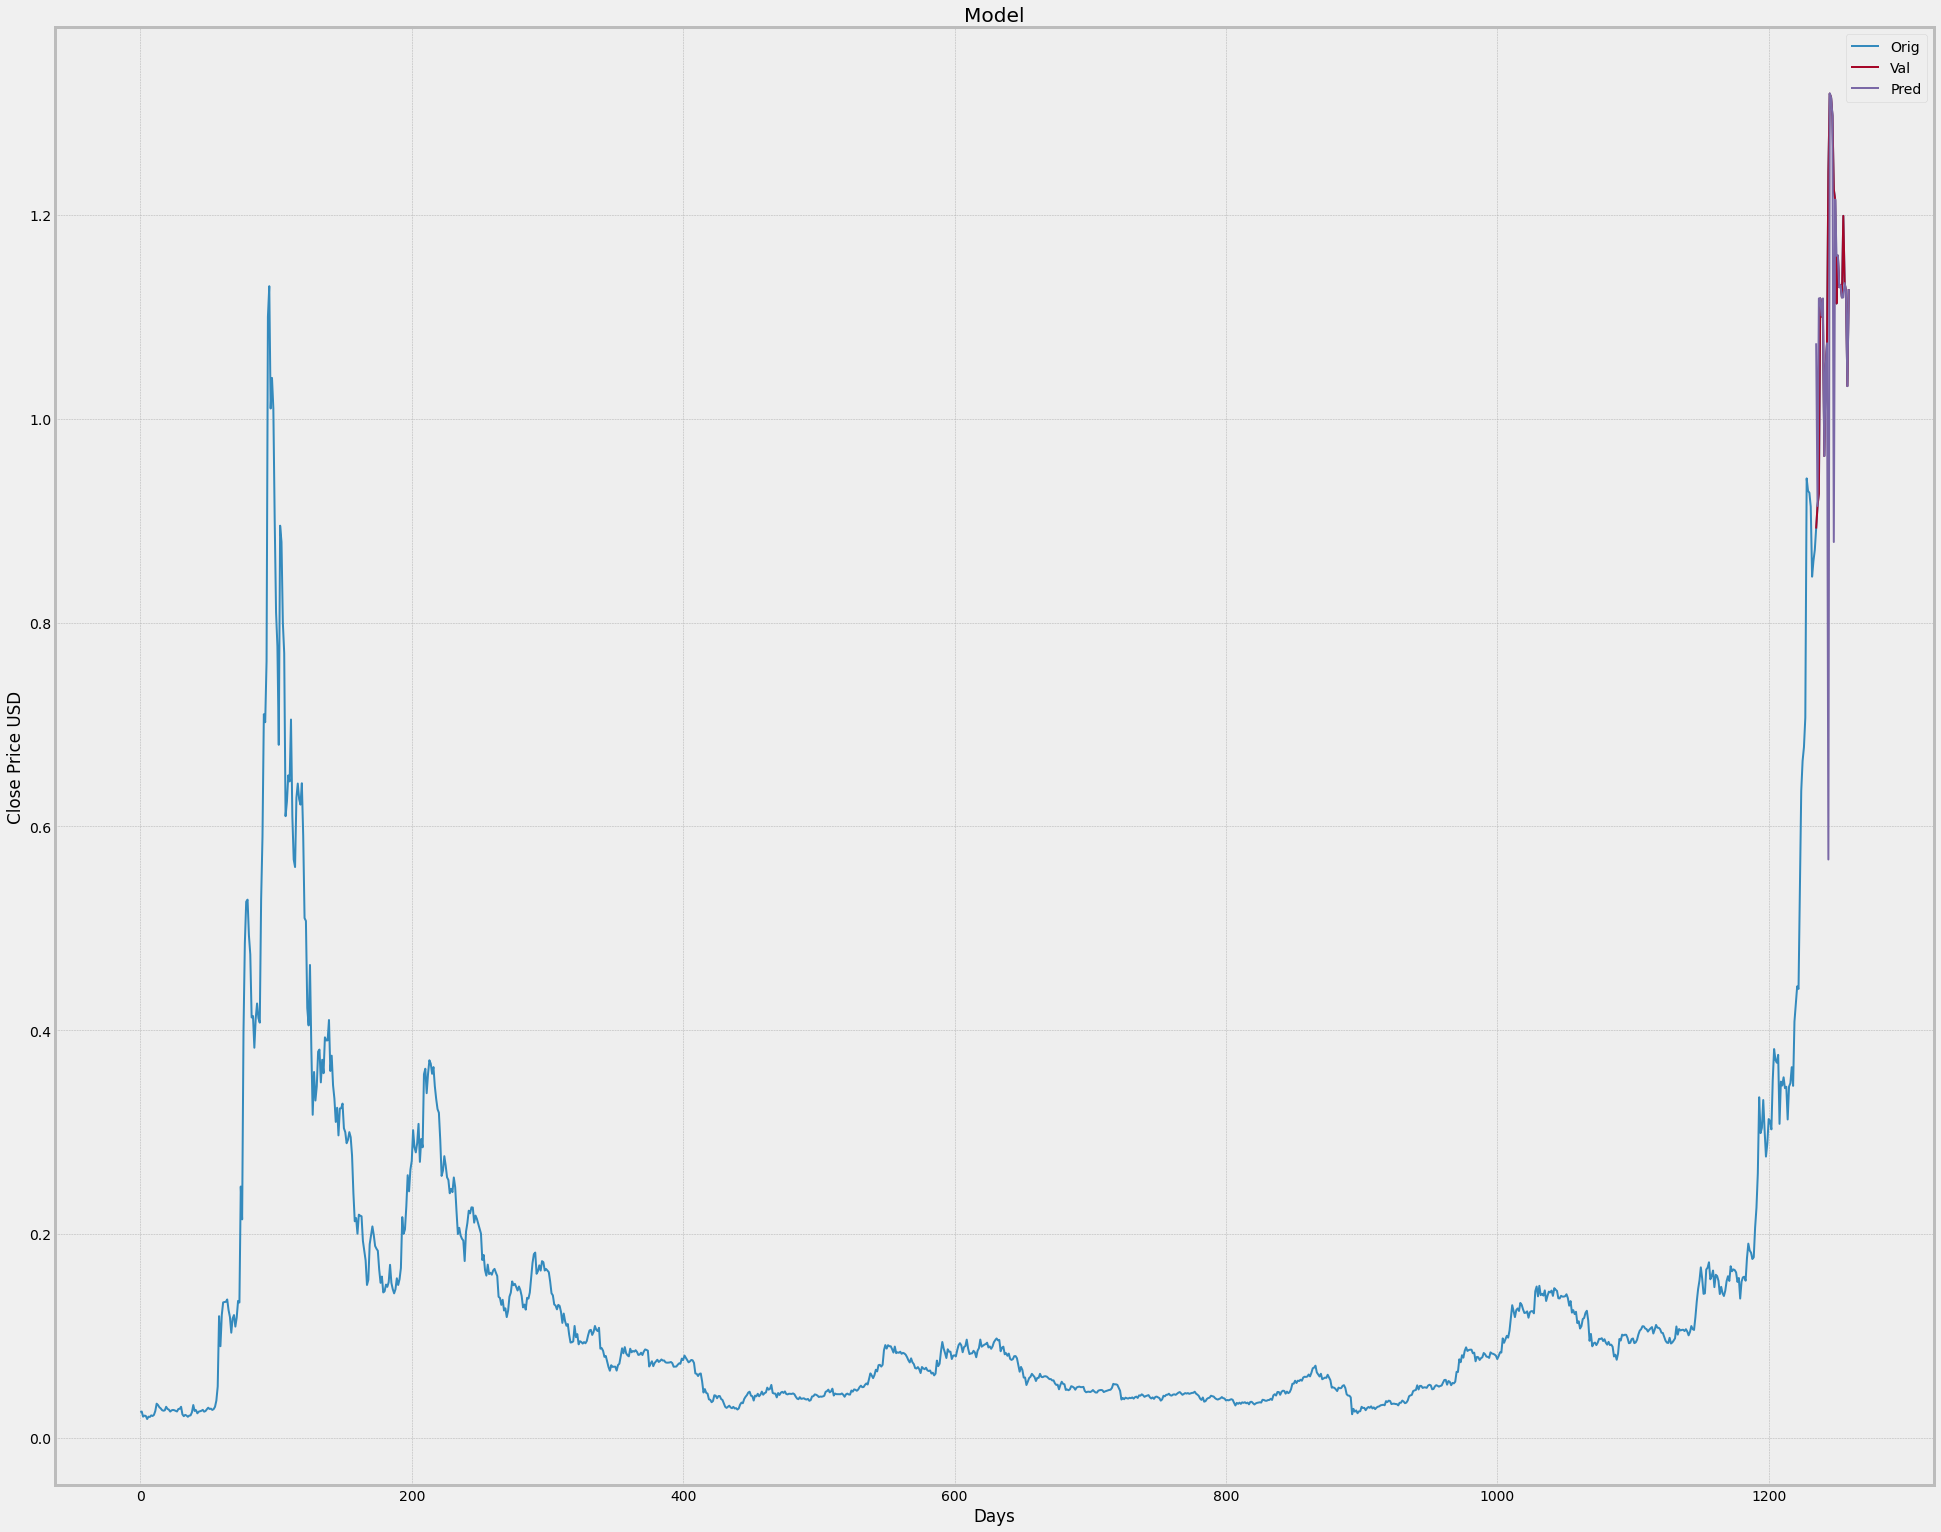

In [101]:
#Visualize the data 
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(30,25))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show();

<ipython-input-102-56624177b6d1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


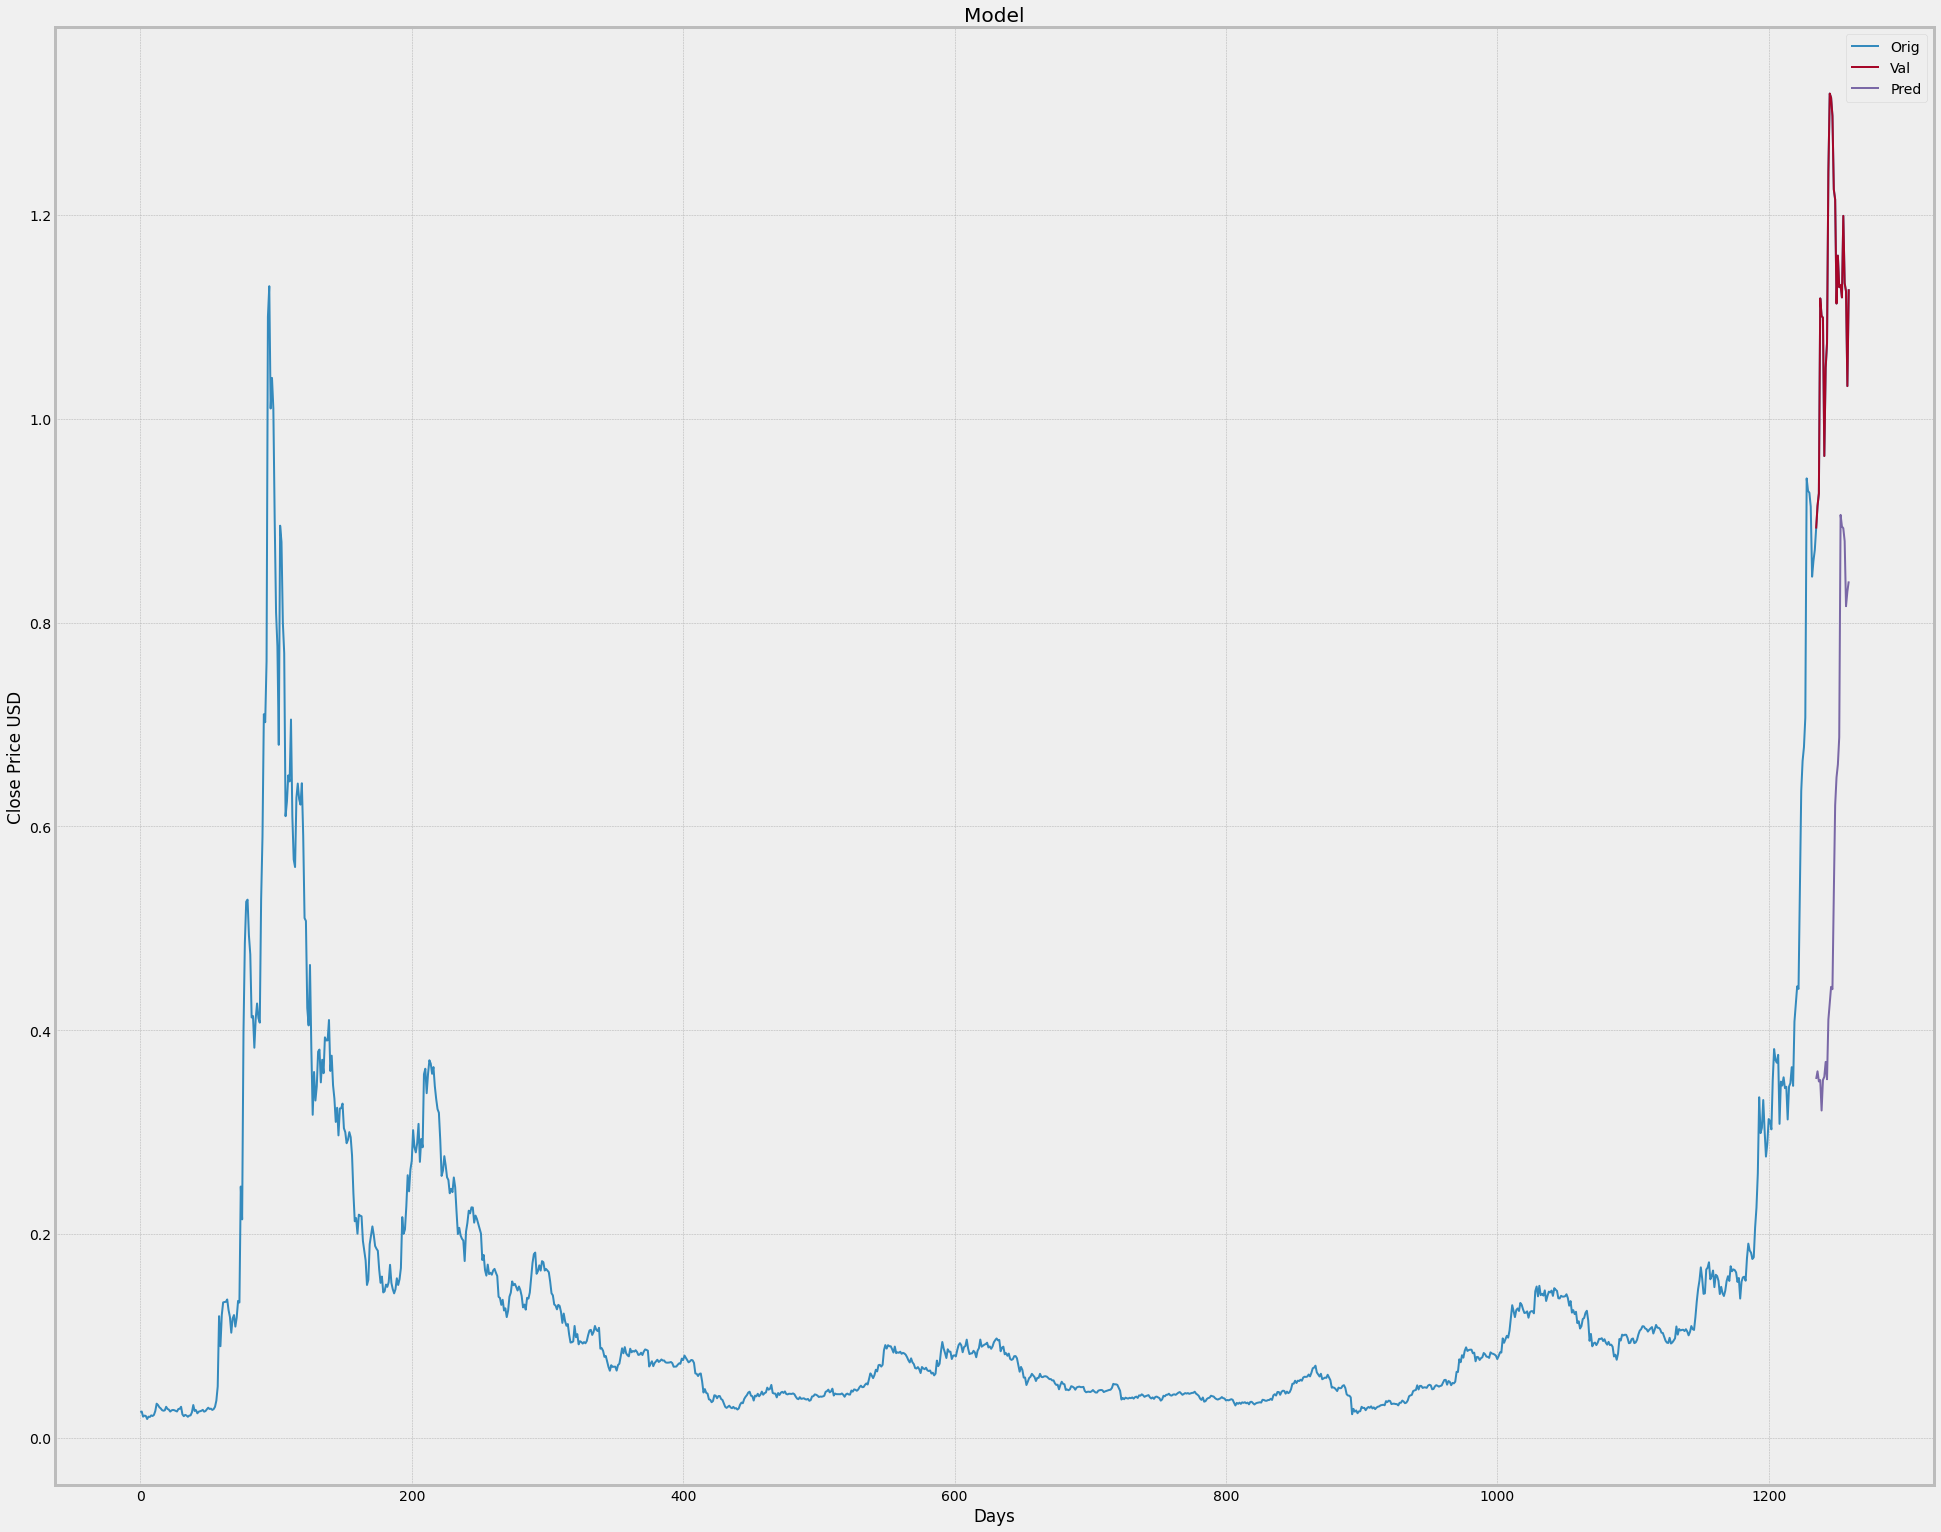

In [102]:
#Visualize the data 
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(30,25))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df['close'])
plt.plot(valid[['close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show();